# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Steven Jayanto Liwang
- **Email:** stevenjliwang@gmail.com
- **ID Dicoding:** stevenzzz

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan dan total pendapatan e-commerce per bulan selama periode dataset?
- Berapa total pengeluaran pelanggan selama periode dataset, dan segmen pelanggan mana yang memberikan kontribusi pendapatan terbesar?
- Wilayah (state) mana yang berkontribusi paling besar terhadap jumlah pesanan selama periode dataset?
- Berapa lama waktu sejak transaksi terakhir pelanggan?
- Seberapa sering pelanggan melakukan transaksi dalam periode yang ditentukan selama periode dataset?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
customers_df=pd.read_csv('data/customers_dataset.csv')
geolocation_df=pd.read_csv('data/geolocation_dataset.csv')
order_items_df=pd.read_csv('data/order_items_dataset.csv')
order_payments_df=pd.read_csv('data/order_payments_dataset.csv')
order_reviews_df=pd.read_csv('data/order_reviews_dataset.csv')
orders_df=pd.read_csv('data/orders_dataset.csv')
product_category_name_translation_df=pd.read_csv('data/product_category_name_translation.csv')
product_df=pd.read_csv('data/products_dataset.csv')
seller_df=pd.read_csv('data/sellers_dataset.csv')

In [3]:
# Info tabel
print("info tabel customers_dataset :")
customers_df.head()

info tabel customers_dataset :


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
print("info tabel geolocation_dataset :")
geolocation_df.head()

info tabel geolocation_dataset :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
print("info tabel order_items_dataset :")
order_items_df.head()


info tabel order_items_dataset :


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
print("info tabel order_payments_dataset :")
order_payments_df.head()

info tabel order_payments_dataset :


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
print("info tabel order_reviews_dataset :")
order_reviews_df.head()

info tabel order_reviews_dataset :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
print("info tabel orders_dataset :")
orders_df.head()

info tabel orders_dataset :


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
print("info tabel product_category_name_translation :")
product_category_name_translation_df.head()

info tabel product_category_name_translation :


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
print("info tabel products_dataset :")
product_df.head()

info tabel products_dataset :


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
print("info tabel sellers_dataset :")
seller_df.head()

info tabel sellers_dataset :


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Penjelasan dataset**
- Dataset customers_dataset berisi id dari pelanggan, awalan kode pos pelanggan, dan kota serta negara dari pelanggan
- Dataset geolocation_dataset berisi awalan kode pos setiap lokasi, koordinat lintang (latitude) dan bujur (longitude) lokasi, dan kota serta negara dari lokasi tersebut
- Pada tabel order_items_dataset terdapat id dari pesanan, item, produk, dan penjual. Dataset ini juga memberitahu batas waktu bagi penjual untuk menyerahkan barang, harga asli produk yang dipesan, dan harga biaya pengiriman
- Dataset order_payment_dataset berisi order id, jumlah pembayaran dalam 1 kejadian, metode pembayaran, jumlah berapa kali cicil, dan total pembayaran
- Dataset order_review_dataset berisi id review dan order, skor yang diberikan, judul dan pesan koomentar, tanggal dikirimnya review ke pelanggan, dan tanggal pelanggan mengirim review
- Pada dataset orders_dataset terdapat id dari pesanan dan pelanggan dan status pesanan. Ada juga tanggal dari pelanggan memesan, pesanan diterima, pesanan diantar, pesanan sampai ke pelanggan, dan perkiraan pesanan sampai ke pelanggan
- Tabel product_category_name_translation berisi kategori produk dalam bahasa Portugis dan bahasa inggris
- Dataset products_dataset berisi deskripsi produk yang terdiri dari id, kategori, panjang nama dan panjang deskripsi produk, jumlah foto produk, berat produk, serta panjang, lebar, dan tinggi produk
- Dataset seller_dataset berisi id penjual dan awalan kode pos penjual, serta kota dan negara penjual

**Insight:**
- Dataset mencatat jumlah pesanan dan total nilai pembayaran yang bisa digabungkan berdasarkan waktu pembelian hingga tingkat bulanannya.
- Setiap pesanan bisa mencakup satu atau lebih barang, dan masing-masing barang memiliki harga serta biaya pengiriman sendiri.
- Total harga barang dan total biaya pengiriman bisa dihitung secara terpisah dari data barang dalam pesanan.
- Pesanan datang dari berbagai daerah (state) pelanggan, dan jumlah pesanan bisa dihitung serta dibandingkan antar daerah.
- Total pengeluaran setiap pelanggan bisa dihitung dari jumlah pembayaran yang terkait dengan pesanan yang dibeli pelanggan tersebut.

### Assessing Data

In [12]:
# Menilai data customers_dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam customer dataset
print("Jumlah data duplikasi pada customers_dataset :", customers_df.duplicated().sum())
customers_df.describe(include='all')

Jumlah data duplikasi pada customers_dataset : 0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**customers_dataset** 
- Tidak ada keanehan data
- Tidak ada duplikasi data

In [14]:
# Menilai data geolocation_dataset
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam geolocation dataset
print("Jumlah data duplikasi pada geolocation_dataset :", geolocation_df.duplicated().sum())
geolocation_df.describe(include='all')

Jumlah data duplikasi pada geolocation_dataset : 261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [16]:
# Akan dicek data duplikat pada geolocation_df terlebih dahulu
geolocation_df[geolocation_df.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


In [17]:
# Setelah mengetahui bahwa ada yang identik, akan dicek apakah ada geolocation_zip_code_prefix yang sama tapi berbeda geolocation_lat dan geolocation_lng
geolocation_df[geolocation_df.duplicated(subset='geolocation_zip_code_prefix')].head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2,1046,-23.546129,-46.642951,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP
19,1046,-23.545884,-46.643163,sao paulo,SP
20,1046,-23.545166,-46.643786,sao paulo,SP
22,1011,-23.546690,-46.635447,são paulo,SP
26,1009,-23.545430,-46.635715,sao paulo,SP
28,1032,-23.539842,-46.635148,são paulo,SP


**Geolocation_dataset**
- Tidak ada keanehan data
- Ada duplikasi sebanyak 261831 yang nantinya akan di drop
- Ada duplikasi geolocation_zip_code_prefix yang memiliki geolocation_lat dan geolocation_lng berbeda

In [18]:
# Menilai data order_items_dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam order items dataset
print("Jumlah data duplikasi pada order_items_dataset :", order_items_df.duplicated().sum())
order_items_df.describe(include='all')

Jumlah data duplikasi pada order_items_dataset : 0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Order item dataset**
- Ada keanehan pada tipe data yaitu kolom shipping_limit_date yang seharusnya adalah datetime
- Tidak ada duplikasi pada dataset.

In [20]:
# Menilai data order_payments_dataset
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam order payments dataset
print("Jumlah data duplikasi pada order_payments_dataset :", order_payments_df.duplicated().sum())
order_payments_df.describe(include='all')

Jumlah data duplikasi pada order_payments_dataset : 0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Order Payment Dataset**
- Tidak ada keanehan pada data
- Tidak ada duplikasi pada data

In [22]:
# Menilai data order_reviews_dataset
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam order reviews dataset
print("Jumlah data duplikasi pada order_reviews_dataset :", order_reviews_df.duplicated().sum())
order_reviews_df.describe(include='all')

Jumlah data duplikasi pada order_reviews_dataset : 0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Order review dataset**
- Terdapat data yang kosong pada kolom review_comment_title dan review comment_message
- Terdapat keanehan pada tipe data pada kolom review_creation_date dan review_answer_timestamp yang seharusnya bertipe datetime, bukan object
- Tidak ada duplikasi data
- Kolom ini tidak penting karena tidak membantu menjawab pertanyaan, maka tidak akan ditindaklanjuti

In [24]:
# Menilai orders_dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [25]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam orders dataset
print("Jumlah data duplikasi pada orders_dataset :", orders_df.duplicated().sum())
orders_df.describe(include='all')

Jumlah data duplikasi pada orders_dataset : 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Orders dataset**
- Ada value kosong pada order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date
- Adanya ketidaksesuaian tipe data pada kolom rder_purchase_timestamp, order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date dan order_estimated_delivery_date

In [26]:
# Menilai product_category_name_translation dataset
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam product category name translation dataset
print("Jumlah data duplikasi pada product_category_name_translation_dataset :", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe(include='all')

Jumlah data duplikasi pada product_category_name_translation_dataset : 0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Product category name translation dataframe**
- Tidak ada keanehan data
- Tidak ada duplikasi data

In [28]:
# Menilai products_dataset
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam products dataset
print("Jumlah data duplikasi pada products_dataset :", product_df.duplicated().sum())
product_df.describe(include='all')

Jumlah data duplikasi pada products_dataset : 0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Products dataset**
- Adanya typo pada kolom product_name_lenght yang seharusnya adalah product_name_length dan product_description_lenght seharusnya adalah product_description_length
- Sangat banyak data kosong yaitu product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- Seharusnya tipe data untuk product_name_lenght, produk description_lenght. dan product_photos_qty adalah int bukan float
- Tidak ada duplikasi data

In [30]:
# Menilai sellers_dataset
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
# Menghitung jumlah duplikasi dan menampilkan ringkasan semua parameter dalam seller dataset
print("Jumlah data duplikasi pada seller_dataset :", seller_df.duplicated().sum())
seller_df.describe(include='all')

Jumlah data duplikasi pada seller_dataset : 0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Seller Dataset**
- Tidak ada keanehan data
- Tidak ada duplikasi data

**Insight:**
- **Geolocation_dataset**
- - Ada duplikasi sebanyak 261831 yang nantinya akan di drop
- - Ada duplikasi geolocation_zip_code_prefix yang memiliki geolocation_lat dan geolocation_lng berbeda yang nantinya akan dirata-ratakan saja koordinatnya agar tidak kehilangan banyak koordinat, lalu yang duplikat akan didrop
- **Order item dataset**
- - Ada keanehan pada tipe data yaitu kolom shipping_limit_date yang seharusnya adalah datetime
- **Order review dataset**
- - - Kolom ini tidak penting karena tidak membantu menjawab pertanyaan, maka tidak akan ditindaklanjuti
- **Orders dataset**
- - Ada value kosong pada order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date
- - Adanya ketidaksesuaian tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date dan order_estimated_delivery_date
- **Products dataset**
- - Adanya typo pada kolom product_name_lenght yang seharusnya adalah product_name_length dan product_description_lenght seharusnya adalah product_description_length
- - Sangat banyak data kosong yaitu product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- - Seharusnya tipe data untuk product_name_lenght, produk description_lenght. dan product_photos_qty adalah int bukan float

### Cleaning Data

In [32]:
# CLEANING GEOLOCATION DATASET
# Menghapus data duplikasi pada geolocation dataset
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah data duplikasi pada geolocation_dataset setelah pembersihan:", geolocation_df.duplicated().sum())

Jumlah data duplikasi pada geolocation_dataset setelah pembersihan: 0


In [33]:
# Ubah geolocation_lat dan geolocation_lng menjadi mean agar tidak banyak geolocation lng dan lat untuk 1 customer_unique_id
geolocation_df['geolocation_lat'] = geolocation_df.groupby('geolocation_zip_code_prefix')['geolocation_lat'].transform('mean')
geolocation_df['geolocation_lng'] = geolocation_df.groupby('geolocation_zip_code_prefix')['geolocation_lng'].transform('mean')

# Drop geolocation_zip_code_prefix duplicated
geolocation_df = geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix')

geolocation_df[geolocation_df.duplicated(subset='geolocation_zip_code_prefix')].sum()

geolocation_zip_code_prefix      0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city                 0
geolocation_state                0
dtype: object

In [34]:
# CLEANING ORDER ITEMS DATASET
# Memperbaiki tipe data pada kolom shipping_limit_date menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [35]:
# CLEANING ORDERS DATASET
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Karena  order_delivered_customer_date memiliki lebih banyak data kosong dibandingkan dengan order_approved_at dan order_delivered_carrier_date, maka data kosong itu yang akan dicek

In [36]:
# Akan dicek terlebih dahulu status dari kolom kosong pada order_delivered_customer_date
orders_df[orders_df.order_delivered_customer_date.isna()]['order_status'].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [37]:
# Akan didrop yang berstatus shipped, canceled, unvailable, invoiced, processing, created, dan approved karena belum terjadi transaksi finansial dan dibutuhkan data yang sesuai periode
rows_to_drop = ['shipped','canceled', 'unavailable', 'invoiced', 'processing', 'created', 'approved']
for status in rows_to_drop:
    orders_df.drop(orders_df[orders_df.order_status == status].index, inplace=True)

# Untuk mengisi order_status delivered dan belum ada tanggal, akan diisi dengan tanggal order_estimated_delivery_date
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96478 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [38]:
# Sekarang melihat order_delivered_carrier_date yang kosong
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,2017-06-23 00:00:00,2017-06-23 00:00:00


In [39]:
# Sekarang melihat order_approved_at yang kosong
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


In [40]:
# Pada kolom order_delivered_carrier_date yang kosong akan didrop saja karena hanya 2
orders_df.dropna(subset=['order_delivered_carrier_date'], inplace=True)
# Pada kolom order_approved_at yang kosong tetap memiliki order_purchase_timestamp dan tidak kosong, maka akan diisi order_purchase_timestamp
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])

# Karena format masih object pada beberapa kolom tanggal, maka akan diubah menjadi datetime
date_columns = [
                'order_purchase_timestamp', 
                'order_approved_at', 
                'order_delivered_carrier_date', 
                'order_delivered_customer_date', 
                'order_estimated_delivery_date'
                ]

for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96476 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [41]:
# Karena data sudah dibersihkan, maka kolom order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_estimated_delivery_date perlu dihapus
orders_df.drop(columns=['order_status', 
        'order_purchase_timestamp', 
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_estimated_delivery_date'], inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_delivered_customer_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.9+ MB


In [42]:
# CLEANING PRODUCTS DATASET
# Perbaiki typo pada kolom product_name_lenght menjadi product_name_length dan product_description_lenght menjadi product_description_length
product_df.rename(columns={'product_name_lenght':'product_name_length', 'product_description_lenght':'product_description_length'}, inplace=True)

# Mengubah tipe data product_name_length, product_description_length, dan product_photos_qty menjadi integer
columns_to_convert = ['product_name_length', 'product_description_length', 'product_photos_qty']
for col in columns_to_convert:
    product_df[col] = pd.to_numeric(product_df[col]).astype('Int64')

# Karena ada banyak product yang tidak masuk dalam kategori, maka akan diisi dengan 'unknown'
product_df['product_category_name']=product_df['product_category_name'].fillna('unknown')

# Panjang nama dan deskripsi akan diisi 0 bagi yang kosong
product_df['product_name_length'] = product_df['product_name_length'].fillna(0)
product_df['product_description_length'] = product_df['product_description_length'].fillna(0)

# Karena data kosong pada product_weight_g, product_length_cm, product_height_cm, dan product_width_cm hanya 2, maka akan didrop
product_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

# product_photos_qty yang kosong akan diisi 0
product_df['product_photos_qty'] = product_df['product_photos_qty'].fillna(0)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_length         32949 non-null  Int64  
 3   product_description_length  32949 non-null  Int64  
 4   product_photos_qty          32949 non-null  Int64  
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: Int64(3), float64(4), object(2)
memory usage: 2.6+ MB


**Insight:**
- **Geolocation_dataset**
- - Duplikasi data hanya bisa didrop kaarena tidak akan berdampak apabila didrop. Duplikasi data harusnya dihilangkan agar tidak ada noise
- **Order item dataset**
- - Tipe data untuk tanggal haruslah diubah menjadi datetime agar nantinya bisa dihitung harinya
- **Order review dataset**
- - Data kosong pada review_comment_title dan review comment_message akan dibuang karena tidak membantu menjawab pertanyaan
- - Tipe data untuk tanggal haruslah diubah menjadi datetime agar nantinya bisa dihitung harinya
- **Orders dataset**
- - Value kosong pada order_approved_at akan disamakan dengan order_purchase_timestamp dengan logika bahwa order langsung diterima setelah pembelian
- - Value kosong pada order_delivered_carrier_date akan disamakan dengan order_approved_at dengan logika bahwa order langsung dikirim setelah di approved
- - Value kosong order_delivered_customer_date akan dicek dahulu statusnya delivered (dikirim) atau belum, jika belum maka akan didrop karena butuh data yang sudah bertransaksi. Data pada baris berstatus delivered dan kosong pada order_delivered_customer_date akan diisi order_estimated_delivery_date dengan anggapan bahwa produk dikirim sesuai estimasi.
- - Memperbaiki tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date dan order_estimated_delivery_date menjadi datetime
- **Products dataset**
- - Memperbaiki salah ketik pada kolom product_name_lenght menjadi product_name_length dan product_description_lenght menjadi product_description_length
- - Mengisi data kosong pada product_category_name menjadi 'unknown' karena tidak masuk dalam kategori apapun, product_name_lenght diisi 0 karena tidak diketahui namanya, dan product_description_lenght diisi 0 karena tidak ada deskripsinya
- - Product_photos_qty yang kosong akan diisi 0 dengan anggapan tidak ada foto
- - Product_weight_g, product_length_cm, product_height_cm, dan product_width_cm yang kosong akan dibuang karena hanya ada 2 yang kosong
- - Memperbaiki tipe data untuk product_name_lenght, produk description_lenght. dan product_photos_qty menjadi int

## Exploratory Data Analysis (EDA)

### Explore ...

In [43]:
# Mengekplore customer dataset
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [44]:
# Melihat pelanggan terbanyak dan paling sedikit berasal dari kota mana
customers_df.groupby(by='customer_city').customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
pedranopolis          1
pedrao                1
matias olimpio        1
pedras altas          1
capela nova           1
Name: customer_unique_id, Length: 4119, dtype: int64

In [45]:
# Melihat pelanggan terbanyak dan paling sedikit berasal dari negara mana
customers_df.groupby(by='customer_state').customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

**Customers Dataset**
- Jumlah pelanggan berdasarkan transaksi adalah 99441 dan jumlah pelanggan berbeda yang pernah melakukan transaksi adalah 96096
- Ada 27 negara berbeda yang pernah memesan dan 4119 kota
- Pelanggan jumlah transaksi terbanyak yaitu sebanyak 17 transaksi
- Kota terbanyak melakukan transaksi adalah Sao Paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba
- Kota paling sedikit melakukan transaksi adalah pedranopolis, pedrao, matias olimpio, pedras altas, dan capela nova
- Negara terbanyak melakukan transaksi adalah SP, RJ, MG, RS, dan PR
- Negara paling sedikit melakukan transaksi adalah RO, AM, AC, AP, dan RR
- Data ini akan digunakan untuk mengecek id pelanggan unik untuk mengetahui pelanggan mana yang berkontribusi paling banyak
- Nantinya akan di buat clustering sederhana dengan pembagian utama adalah lokasi (kota sama) dan frekuensi penjualan

In [46]:
# Mengekplore geolocation dataset
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,19015.000000,19015.000000,19015.000000,19015,19015
unique,NaN,NaN,NaN,5955,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,2652,6349
mean,42711.591901,-19.054532,-46.057013,NaN,NaN
std,30905.051745,7.297051,5.367722,NaN,NaN
min,1001.000000,-33.689890,-72.916069,NaN,NaN
25%,12721.500000,-23.564166,-49.002485,NaN,NaN
50%,38240.000000,-22.417670,-46.631843,NaN,NaN
75%,70656.500000,-15.608720,-43.255602,NaN,NaN


In [47]:
# Menggabungkan data customers_dataset dengan geolocation_dataset berdasarkan kolom customer_zip_code_prefix
merged_customers_geo_df = pd.merge(
                          left=customers_df, 
                          right=geolocation_df, 
                          left_on='customer_zip_code_prefix', 
                          right_on='geolocation_zip_code_prefix', 
                          how='left')

merged_customers_geo_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.499273,-47.396658,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.728396,-46.542250,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.531309,-46.656690,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.500670,-46.186348,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.975708,-47.143140,campinas,SP


In [48]:
# Membuang kolom geolocation_zip_code_prefix agar lebih rapi
merged_customers_geo_df.drop(columns=['geolocation_zip_code_prefix'], inplace=True)
merged_customers_geo_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.499273,-47.396658,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.728396,-46.542250,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531309,-46.656690,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.500670,-46.186348,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975708,-47.143140,campinas,SP


**Geolocation dataset**
- Akan digunakan nantinya untuk letak lokasi presisi pelanggan pada gooogle map

In [49]:
# Mengekplore order items dataset
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


**Order items dataset**
- Jumlah pesanan selama periode dataset adalah 112650
- Rata-rata membeli 1 item dan paling banyak adalah 21 item
- Produk berbeda yang berhasil terjual adalah sebanyak 32951.
- Suatu produk maksimal terjual sebanyak 527 buah
- Ada 3095 penjual dengan penjualan tertinggi dalam satu penjual adalah 2033
- Harga rata-rata produk adalah 120,65 dengan harga termahal adalah 6735 dan harga terendah adalah 0,85
- Biaya rata-rata pengiriman adalah 19,99 dengan harga termahal adalah 409,68 dan terkadang gratis biaya pengiriman

In [50]:
# Mengexplore order payments dataset
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [51]:
# Akan dicek tipe pembayaran dan jumlah membayarnya
order_payments_df.groupby(by='payment_type').payment_value.agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
payment_type,,,,,
boleto,19784,2869361.27,145.034435,11.62,7274.88
credit_card,76795,12542084.19,163.319021,0.01,13664.08
debit_card,1529,217989.79,142.570170,13.38,4445.50
not_defined,3,0.00,0.000000,0.00,0.00
voucher,5775,379436.87,65.703354,0.00,3184.34


**Order Payments Dataset**
- Jumlah yang melakukan transaksi adalah 103886 yang dimana lebih sedikit dari jumlah order di order_items_dataset. Artinya masih banyak pesanan yang belum dieksekusi
- Kebanyakan orang menggunakan credit_card untuk membayar dengan rata-rata melakukan pencicilan sebanyak 2-3 dan paling lama adalah 24 kali
- Biaya rata-rata yang dibayar adalah 154 dengan minimal pembayaran 0 dan maksimal 13664
- Tipe pembayaran credit_card menyumbang paling banyak yaitu 13664 dan tipe pembayaran tidak terdefinisi (not_defined) menyumbang 0. 
- Order payment akan digunakan untuk melihat trend jumlah pendapatan e-commerce (pertanyaan 1)

In [52]:
# Mengeksplore orders dataset
orders_df.describe(include='all')

,order_id,customer_id,order_delivered_customer_date
count,96476,96476,96476
unique,96476,96476,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,NaN
freq,1,1,NaN
mean,NaN,NaN,2018-01-14 12:58:35.418736384
min,NaN,NaN,2016-10-11 13:46:32
25%,NaN,NaN,2017-09-25 22:18:27.500000
50%,NaN,NaN,2018-02-02 19:44:51.500000
75%,NaN,NaN,2018-05-15 23:10:03.249999872
max,NaN,NaN,2018-10-17 13:22:46


In [53]:
# Menggabungkan orders dataset dengan order payments dataset berdasarkan kolom order_id
merged_orders_payments_df = pd.merge(
                            left=orders_df, 
                            right=order_payments_df, 
                            on='order_id', 
                            how='left')

merged_orders_payments_df.head()

,order_id,customer_id,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,1.0,credit_card,3.0,179.12


In [54]:
# Menggabungkan orders dataset dengan customers dataset berdasarkan kolom customer_id
merged_orders_customers_df = pd.merge(
                            left=orders_df, 
                            right=customers_df, 
                            on='customer_id', 
                            how='left')

merged_orders_customers_df.head()

,order_id,customer_id,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [55]:
# Menggabungkan orders dataset dengan customers_orders_and_payment berdasarkan kolom customer_id
# Akan digabungkan dengan merged_orders_payments_df dan customers_df berdasarkan customer_id
customers_orders_and_payment = pd.merge(
                        left=merged_orders_payments_df, 
                        right=customers_df[['customer_id', 'customer_unique_id', 'customer_state']], 
                        on='customer_id', 
                        how='left')

# Untuk menyederhanakan, akan dibuang kolom order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, payment_sequential, payment_installments, dan customer_id
customers_orders_and_payment.drop(columns=[ 
                                  'payment_sequential',
                                  'payment_installments',
                                  'customer_id'
                                  ], inplace=True)

# Akan dikelompokkan berdasarkan payment_type, payment_value, dan customer_state untuk melihat total pembayaran, rata-rata pembayaran, dan jumlah order
q1 = customers_orders_and_payment['payment_value'].quantile(0.25)
q2 = customers_orders_and_payment['payment_value'].quantile(0.5)
q3 = customers_orders_and_payment['payment_value'].quantile(0.75)
def kelompokkan_payment_value(df):
    if df <= q1:
        return 'Rendah'
    elif df <= q2:
        return 'Sedang'
    elif df <= q3:
        return 'Tinggi'
    else:
        return 'Sangat tinggi'
    
customers_orders_and_payment['kelompok_payment_value'] = customers_orders_and_payment['payment_value'].apply(kelompokkan_payment_value)

# Membuat clustering berdasarkan payment_type dan kelompok_payment_value
clustering_df = customers_orders_and_payment.groupby(['payment_type', 'kelompok_payment_value']).agg({
    'order_id': 'count',
    'customer_unique_id': 'nunique',
    'customer_state': lambda x: x.mode()[0]
}).rename(columns={
    'order_id': 'total_orders',
    'customer_unique_id': 'unique_customers',
    'customer_state': 'top_state'
}).reset_index()

clustering_df

,payment_type,kelompok_payment_value,total_orders,unique_customers,top_state
0,boleto,Rendah,4986,4919,SP
1,boleto,Sangat tinggi,4231,4156,SP
2,boleto,Sedang,5186,5139,SP
3,boleto,Tinggi,4788,4744,SP
4,credit_card,Rendah,16144,15817,SP
5,credit_card,Sangat tinggi,20275,19948,SP
6,credit_card,Sedang,18777,18509,SP
7,credit_card,Tinggi,19388,19151,SP
8,debit_card,Rendah,440,436,SP
9,debit_card,Sangat tinggi,324,323,SP


In [56]:
# Membuat clustering berdasarkan kelompok payment_value sangat tinggi sebagai utamanya
def top_5_states(x):
    return ', '.join(x.value_counts().head(5).index)

clustering_payment_value_df = customers_orders_and_payment.groupby(['payment_type', 'kelompok_payment_value']).agg({
    'order_id': 'count',
    'customer_unique_id': 'nunique',
    'customer_state': top_5_states,
    'payment_value': 'mean'
}).rename(columns={
    'order_id': 'total_orders',
    'customer_unique_id': 'unique_customers',
    'customer_state': 'top_state',
    'payment_value' : 'payment_value'
}).reset_index()

clustering_payment_value_df= clustering_payment_value_df[clustering_payment_value_df['kelompok_payment_value']=='Sangat tinggi']
clustering_payment_value_df

,payment_type,kelompok_payment_value,total_orders,unique_customers,top_state,payment_value
1,boleto,Sangat tinggi,4231,4156,"SP, MG, RJ, RS, PR",364.929624
5,credit_card,Sangat tinggi,20275,19948,"SP, RJ, MG, RS, PR",368.578982
9,debit_card,Sangat tinggi,324,323,"SP, RJ, MG, RS, PR",361.859753
13,voucher,Sangat tinggi,355,329,"SP, RJ, MG, RS, PR",302.646535


**Orders Dataset**
- Jumlah pesanan yang tereksekusi adalah 96476 dan jumlah pelanggan adalah 96476, lebih sedikit dari jumlah pelanggan di customers dataset, artinya dalam periode ini masih ada pelanggan yang belum melakukan pemesanan
- Data ini akan digunakan untuk menjawab pertanyaan nomor 1 karena adanya tren dari pembelian

In [57]:
# Mengexplore product_category_name_translation dataset
product_category_name_translation_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Product Category Name Translation**
- Dataset ini berguna apabila dibutuhkan arti dari category name product


In [58]:
# Mengexplore products dataset
product_df.describe(include='all')

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949,32949,32949.0,32949.0,32949.0,32949.000000,32949.000000,32949.000000,32949.000000
unique,32949,74,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
freq,1,3029,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.580594,757.232814,2.148502,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,12.069277,637.750493,1.745738,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,0.0,0.0,0.0,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,41.0,326.0,1.0,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.0,584.0,1.0,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.0,961.0,3.0,1900.000000,38.000000,21.000000,30.000000


**Products Dataset**
- Jumlah produk unik adalah 32949 dan ada 74 kategori
- Panjang nama produk maksimal 76 dan rata-rata 47 huruf
- Panjang deskripsi produk maksimal 3992 dan rata-rata adalah 757
- Banyak foto dalam satu produk maksimal 20
- BErat produk maksimal adalah 40425 gram atau setara 40 kilogram, dengan panjang dan tinggi maksimal adalah 105 dan lebar maksimal 118

In [59]:
# Mengeksplore sellers dataset
seller_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Selers Dataset**
- Jumlah penjual adalah 3095 dari 23 negara berbeda dan 611 kota berbeda


**Insight:**
- Pertanyaan pertama akan dijawab oleh orders dataset yaitu tren jumlah pesanan. Selain itu, juga akan dijawab oleh orders dataset dan order payment dataset (merged_orders_payments_df) untuk tren pendapatan e-commerce
- Jawaban pertanyaan kedua akan dibantu oleh clustering_payment_value_df
- Pertanyaan ketiga akan dijawab oleh gabungan customers dataset dan geolocation dataset (merged_customers_geo_df)
- Pertanyaan keempat akan dibantu oleh customers_df dan orders_df untuk mengetahui berapa lama waktu sejak transaksi terakhir pelanggan. Selain itu, clustering_df dan orders_df untuk mengetahui kecenderungan untuk melakukan transaksi itu yang mana.
- Pertanyaan kelima akan dibantu oleh customers dataset dan dan orders dataset (merged_orders_customers_df) 


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren jumlah pesanan dan total pendapatan e-commerce per bulan selama periode dataset?

Pertanyaan pertama akan dijawab oleh orders dataset yaitu tren jumlah pesanan. Selain itu, juga akan dijawab oleh orders dataset dan order payment dataset (merged_orders_payments_df) untuk tren pendapatan e-commerce

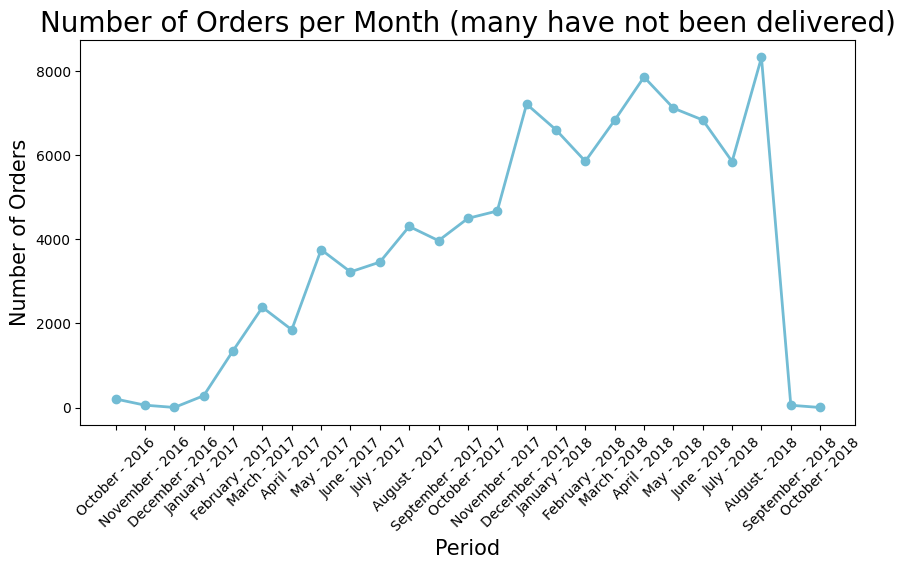

In [60]:
# Akan divisualisasikan tren jumlah pesanan setiap bulannya
monthly_orders_df = orders_df.resample('ME', on='order_delivered_customer_date').agg({
    'order_id': 'nunique'
    })

monthly_orders_df.index = monthly_orders_df.index.strftime('%B - %Y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={'order_id': 'total_orders'}, inplace=True)

plt.figure(figsize=(10,5))
plt.xlabel('Period', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.plot(monthly_orders_df['order_delivered_customer_date'], monthly_orders_df['total_orders'], marker='o', linewidth=2, color='#72BCD4')
plt.title("Number of Orders per Month (many have not been delivered)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
plt.show()

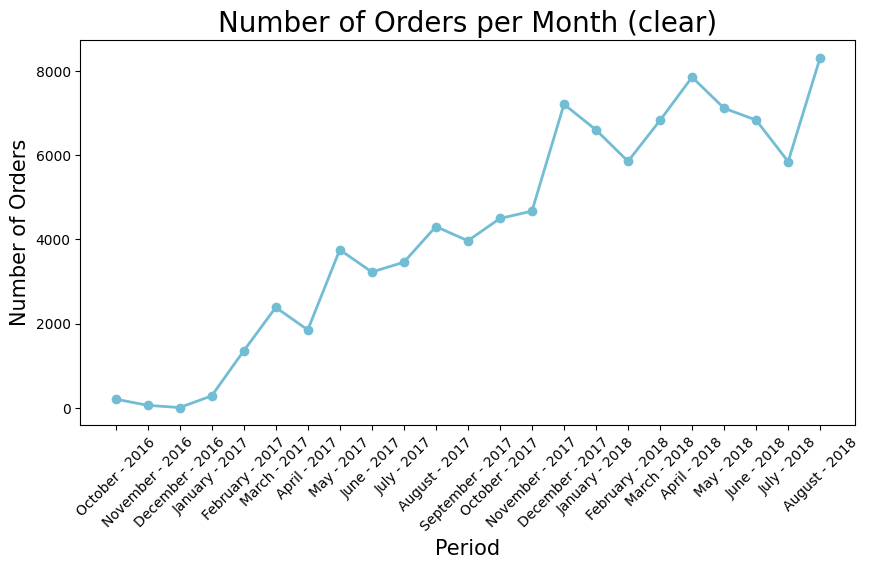

In [61]:
# Pada grafik akhir August 2018 terlihat penurunan jumlah pesanan yang signifikan dibandingkan bulan-bulan sebelumnya. 
# Hal  ini terjadi karena banyak pesanan yang diidrop karena butuh data yang sudah diantar ke pelanggan
# Akan diatur tanggal terbaru adalah August 2018
monthly_orders_df = orders_df.resample('ME', on='order_delivered_customer_date').agg({
    'order_id': 'nunique'
    })

monthly_orders_df = monthly_orders_df.loc[
    monthly_orders_df.index <= '2018-08-31'
]

monthly_orders_df.index = monthly_orders_df.index.strftime('%B - %Y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={'order_id': 'total_orders'}, inplace=True)

plt.figure(figsize=(10,5))
plt.xlabel('Period', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.plot(monthly_orders_df['order_delivered_customer_date'], monthly_orders_df['total_orders'], marker='o', linewidth=2, color='#72BCD4')
plt.title("Number of Orders per Month (clear)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
plt.show()

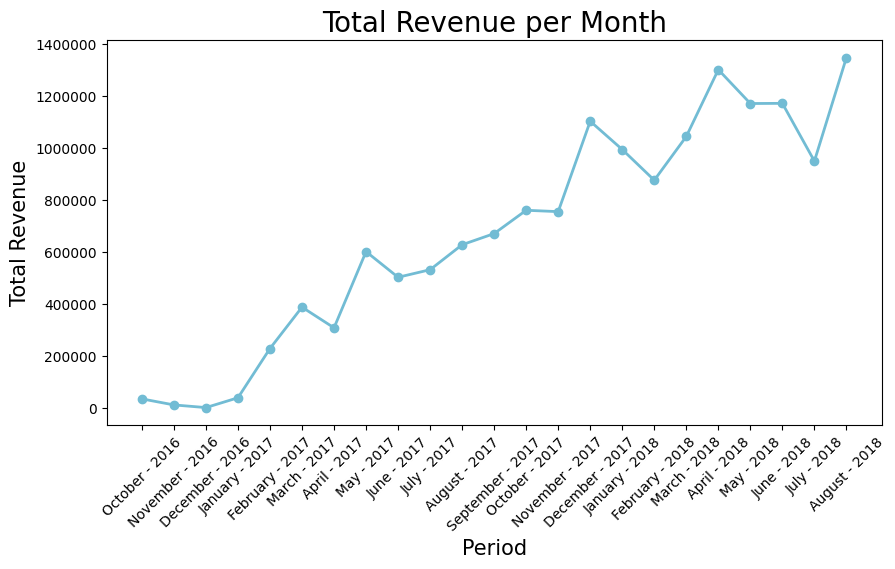

In [62]:
# Tren pendapatan e-commerce
monthly_revenue_order_df = merged_orders_payments_df.resample('ME', on='order_delivered_customer_date').agg({
    'payment_value': 'sum'
    })

monthly_revenue_order_df = monthly_revenue_order_df.loc[
    monthly_revenue_order_df.index <= '2018-08-31'
]

monthly_revenue_order_df.index = monthly_revenue_order_df.index.strftime('%B - %Y')
monthly_revenue_order_df = monthly_revenue_order_df.reset_index()
monthly_revenue_order_df.rename(columns={'payment_value': 'total_revenue'}, inplace=True)

plt.figure(figsize=(10,5))
plt.xlabel('Period', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)
plt.plot(monthly_revenue_order_df['order_delivered_customer_date'], monthly_revenue_order_df['total_revenue'], marker='o', linewidth=2, color='#72BCD4')
plt.title("Total Revenue per Month", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 2, 4, 5:
- Berapa total pengeluaran pelanggan selama periode dataset, dan segmen pelanggan mana yang memberikan kontribusi pendapatan terbesar?
- Berapa lama waktu sejak transaksi terakhir pelanggan?
- Seberapa sering pelanggan melakukan transaksi dalam periode yang ditentukan selama periode dataset?
- Jawaban akan dijawab oleh rfm_df

In [63]:
# Total pengeluaran segmen-segmen pelanggan selama periode dataset
customers_orders_and_payment['order_delivered_customer_date'] = (
    customers_orders_and_payment['order_delivered_customer_date']
    .dt.normalize()
)

rfm_df = customers_orders_and_payment.groupby('customer_unique_id', as_index=False).agg({
        'order_delivered_customer_date': 'max',
        'order_id': 'count',
        'payment_value': 'sum'
    })

rfm_df.columns = ['customer_unique_id', 'max_order_timestamp', 'frequency', 'monetary']

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,154
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,160
2,0000f46a3911fa3c0805444483337064,1,86.22,560
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,350
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,324


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8976\496174126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8976\496174126.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8976\496174126.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


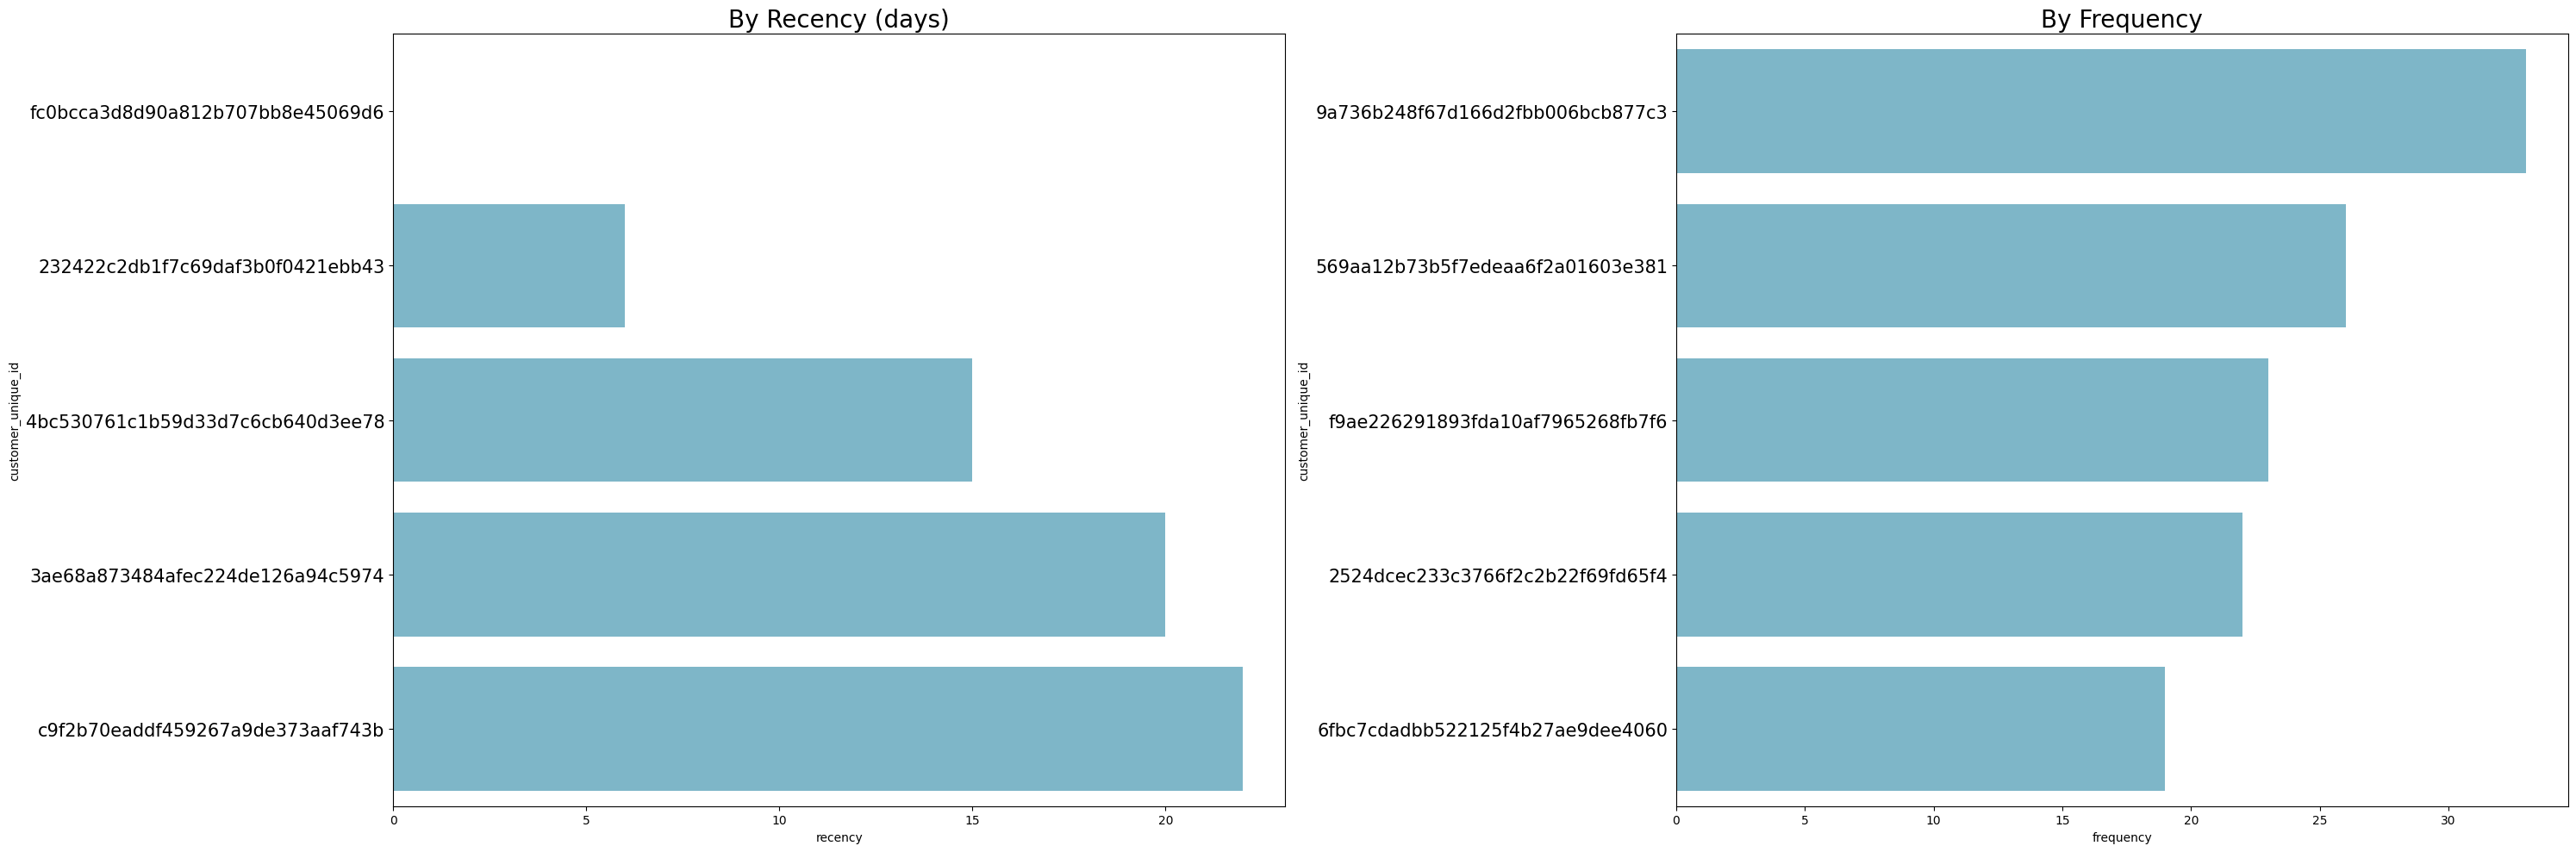

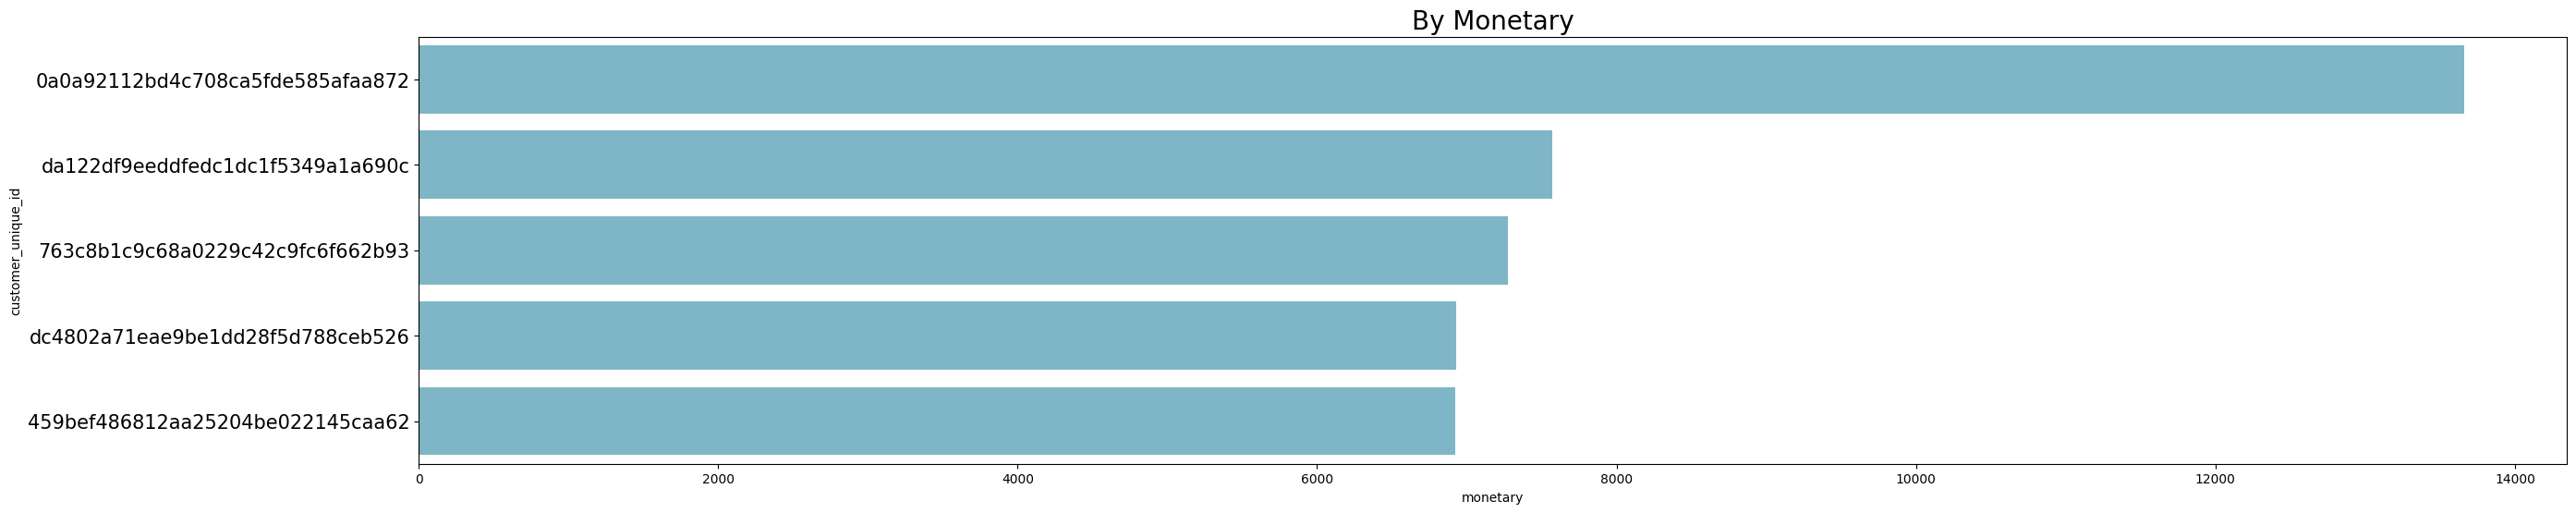

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
# By Recency
sns.barplot(
    x="recency",
    y="customer_unique_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("By Recency (days)", loc="center", fontsize=20)
ax[0].tick_params(axis='y', labelsize=15)

# By Frequency
sns.barplot(
    x="frequency",
    y="customer_unique_id",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_title("By Frequency", loc="center", fontsize=20)
ax[1].tick_params(axis='y', labelsize=15)

plt.tight_layout()

# By Monetary
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 6))
sns.barplot(
    x="monetary",
    y="customer_unique_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax
)
ax.set_title("By Monetary", loc="center", fontsize=20)
ax.tick_params(axis='y', labelsize=15)

In [65]:
print("Segmen pelanggan yang memberikan kontribusi pendapatan terbesar:")
clustering_payment_value_df

Segmen pelanggan yang memberikan kontribusi pendapatan terbesar:


,payment_type,kelompok_payment_value,total_orders,unique_customers,top_state,payment_value
1,boleto,Sangat tinggi,4231,4156,"SP, MG, RJ, RS, PR",364.929624
5,credit_card,Sangat tinggi,20275,19948,"SP, RJ, MG, RS, PR",368.578982
9,debit_card,Sangat tinggi,324,323,"SP, RJ, MG, RS, PR",361.859753
13,voucher,Sangat tinggi,355,329,"SP, RJ, MG, RS, PR",302.646535


### Pertanyaan 3
Wilayah (state) mana yang berkontribusi paling besar terhadap jumlah pesanan selama periode dataset?
- Akan dijawab oleh orders_df dan merged_customers_geo_df

In [66]:
# Negara dengan kontribusi terbesar terhadap pesanan menggunakan pie chart
orders_customers_geolocation_df = pd.merge(
    left=orders_df,
    right=merged_customers_geo_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_geolocation_df.head()

,order_id,customer_id,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.577482,-46.587077,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.186877,-44.540232,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745150,-48.514783,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774002,-35.270976,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.676257,-46.514580,santo andre,SP


In [67]:
# Drop kolom yang duplikat
orders_customers_geolocation_df = orders_customers_geolocation_df.drop(
    columns=
    [
        'geolocation_city',
        'geolocation_state',
    ]
)

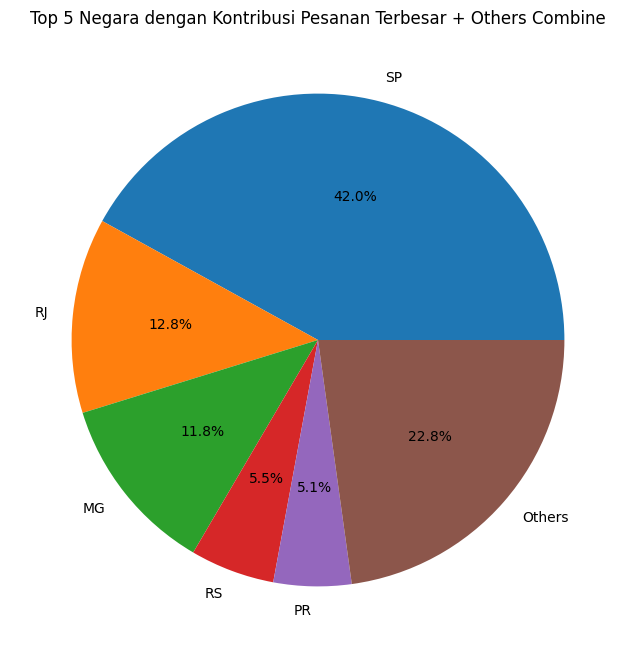

In [68]:

orders_customers_geolocation = orders_customers_geolocation_df.groupby(
    'customer_state',
    as_index=False
).agg({
    'order_id': 'count'
})
orders_customers_geolocation.columns = ['customer_state', 'total_orders']

# Urutkan
orders_customers_geolocation = orders_customers_geolocation.sort_values(
    'total_orders',
    ascending=False
)
# ambil top 5
top5 = orders_customers_geolocation.head(5)

# gabungkan sisanya jadi "Others"
others = orders_customers_geolocation.iloc[5:]['total_orders'].sum()

top5_with_others = pd.concat([
    top5,
    pd.DataFrame({
        'customer_state': ['Others'],
        'total_orders': [others]
    })
])

plt.figure(figsize=(8, 8))

plt.pie(
    x=top5_with_others['total_orders'],
    labels=top5_with_others['customer_state'],
    autopct='%1.1f%%'
)

plt.title('Top 5 Negara dengan Kontribusi Pesanan Terbesar + Others Combine')
plt.show()

In [69]:
# Menyimpan data penting ke folder dashboard untuk di streamlit nantinya
monthly_orders_df.to_csv('dashboard/monthly_orders_df.csv', index=False)
monthly_revenue_order_df.to_csv('dashboard/monthly_revenue_order_df.csv', index=False)
customers_orders_and_payment.to_csv('dashboard/customers_orders_and_payment.csv', index=False)
orders_customers_geolocation_df.to_csv('dashboard/orders_customers_geolocation_df.csv', index=False)

**Insight:**
- Penjualan dan pendapatan cenderung mengalami tren kenaikan
- Total pengeluaran pelanggan selama periode dataset yang tertinggi adalah sekitar 1300-14000
- Segmen pelanggan dengan pengeluaran tertinggi (diatas 75% dari pendapatan e-commerce) adalah pelanggan yang menggunakan credit-card dari negara SP, RJ, MG, RS, PR dengan rata-rata nilai pembayaran adalah 368,578982 dan total order adalah 20275
- Ada pelanggan yang sangat sering datang yaitu lebih dari 30 kali.
- Waktu transaksi pelanggan yang terbaru adalah 0 hingga 25 hari
- 5 negara dengan transaksi terbesar selama periode dataset yaitu SP, MG, RJ, RS, dan terakhir PR. Untuk others itu adalah negara lain yang tidak lebih dari persentase dari negara kelima terbesar yaitu PR.

## Analisis Lanjutan (Opsional)

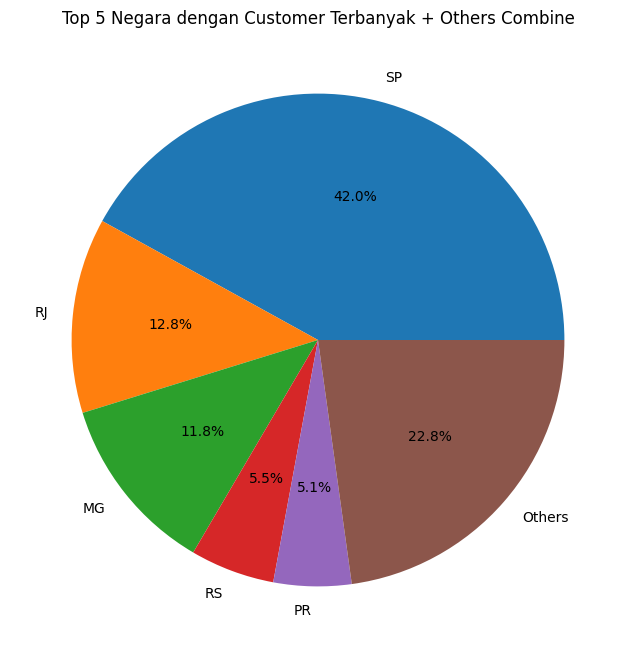

In [70]:
# Melihat negara mana dengan customer terbanyak
customers_geolocation_top5 = orders_customers_geolocation_df.groupby(
    'customer_state',
    as_index=False
).agg({
    'customer_unique_id': 'count'
})
customers_geolocation_top5.columns = ['customer_state', 'total_customer']

# Ambil top 5
customers_geolocation_top5 = customers_geolocation_top5.sort_values(
    'total_customer',
    ascending=False
)
# ambil top 5
top5 = customers_geolocation_top5.head(5)

# gabungkan sisanya jadi "Others"
others = customers_geolocation_top5.iloc[5:]['total_customer'].sum()

top5_with_others = pd.concat([
    top5,
    pd.DataFrame({
        'customer_state': ['Others'],
        'total_customer': [others]
    })
])

plt.figure(figsize=(8, 8))

plt.pie(
    x=top5_with_others['total_customer'],
    labels=top5_with_others['customer_state'],
    autopct='%1.1f%%'
)

plt.title('Top 5 Negara dengan Customer Terbanyak + Others Combine')
plt.show()

## Conclusion

- Conclution pertanyaan 1
   - Pada 3 bulan di tahun 2016 yaitu oktober hingga desember, pergerakan tidak bergerak drastis. Pada tahun 2017 bulan januari hingga maret terjadi kenaikan hingga 500% yaitu dari sekitar 500 hingga 2500 dengan kenaikan 2000 pesanan. Pada bulan November ke December tahun 2017, terjadi kenaikan 50% yaitu kenaikan tertinggi hanya dalam 1 bulan yaitu penambahan sekitar 2500 pesanan. Pada bulan Juli 2018 ke Agustus 2018 terjadi kenaikan 50% lagi seperti pada November ke Desember 2017. Kenaikannya mencapai 50% dari 6000 menjadi 9000 pesanan dengan peningkatan adalah 3000. Pada bulan Agustus ke September terjadi penurunan drastis hingga 99% yaitu sekitar 8950 pesanan. Hal itu terjadi karena masih banyak pesanan yang belum sampai, belum diapprove, belum diantar, atau masih dalam pengemasan. Maka dari itu, digunakan data terakhir adalah Agustus 2018.
   - Untuk pendapatan juga mirip, pada 3 bulan di tahun 2016 yaitu oktober hingga desember, pergerakan tidak bergerak drastis. Pada tahun 2017 bulan januari hingga maret terjadi kenaikan hingga 700% yaitu dari sekitar 50.000 menjadi 400.000 dengan peningkatan 350.000. Pada bulan November ke December tahun 2017, terjadi kenaikan 38% yaitu kenaikan tertinggi hanya dalam 1 bulan yaitu kenaikan sekitar 300.000. Pada bulan Juli 2018 ke Agustus 2018 terjadi kenaikan 28% dengan kenaikan 390.000
   
- conclution pertanyaan 3
  - 5 negara dengan transaksi terbesar selama periode dataset secara berurutan yaitu SP, MG, RJ, RS, dan terakhir PR. SP menyumbang 42% dari total pesanan sebagai yang tertinggi. Selain itu, pelanggan terbanyak juga berasal dari SP dengan persentase 42% Untuk others itu adalah negara lain yang tidak lebih dari persentase dari negara kelima terbesar yaitu PR. 

- Conclution pertanyaan 2, 4, 5
  - Total pengeluaran pelanggan selama periode dataset yang tertinggi adalah sekitar 1300-14000
  - Segmen pelanggan dengan pengeluaran tertinggi (diatas 75% dari pendapatan e-commerce) adalah pelanggan yang menggunakan credit-card dari negara SP, RJ, MG, RS, PR dengan rata-rata nilai pembayaran adalah 368,578982 dan total order adalah 20275
  - Ada pelanggan yang sangat sering datang yaitu lebih dari 30 kali.
  - Waktu transaksi pelanggan yang terbaru adalah 0 hingga 25 hari